In [1]:
from __future__ import division
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import scipy.optimize
import pandas.io.sql as psql
import pandas as pd
import sys
sys.path.insert(1, r'C:\Users\Sean Violante\Documents\Projects\lendico\lib')
import dwh

In [2]:
%matplotlib qt

In [54]:
conn = dwh.get_DWH()


In [66]:
actual_payments_combined.columns

Index([                           u'dwh_country_id',
                                u'fk_user_borrower',
                                u'fk_user_investor',
                                         u'fk_loan',
                                 u'loan_request_nr',
                                        u'iso_date',
                                        u'interval',
                           u'interval_payback_date',
                      u'next_interval_payback_date',
                                   u'loan_coverage',
                     u'eur_payment_amount_borrower',
                   u'eur_principal_amount_borrower',
                    u'eur_interest_amount_borrower',
           u'eur_initial_principal_amount_borrower',
       u'eur_sum_interval_interest_amount_borrower',
           u'eur_residual_interest_amount_borrower',
          u'eur_residual_principal_amount_borrower',
                                u'calc_service_fee',
                     u'eur_payment_amount_inve

In [4]:
%cd  C:\Users\Sean Violante\Documents\Projects\lendico\projects\returns\src

C:\Users\Sean Violante\Documents\Projects\lendico\projects\returns\src


In [36]:
arrears_dict={30:0.15,60:0.35, 90:0.67, 120:1,150:1,180:1,210:1,240:1,270:1}
arrears_dict={30:0.195, 60: 0.44, 90:0.611, 120:1,150:1,180:1,210:1,240:1,270:1}
arrears_dict={30:0.164, 60: 0.384, 90:0.55, 120:1,150:1,180:1,210:1,240:1,270:1}

In [94]:
%run returns.py
sql_strings=get_sql_strings()
print sql_strings.keys()

['actual_payments_combined_date', 'payment_plans_combined', 'payment_plans', 'actual_payments_combined', 'actual_payments', 'actual_payments_combined1', 'loans', 'loan_fundings']


In [401]:
payment_plans_combined.initial_principal_amount_investor.isnull().sum()

2646

In [ ]:
actual_payments_combined_date[actual_payments_combined_date.fk_loan==75]

In [55]:
%time loans=psql.read_sql_query(sql_strings['loans'],conn)

Wall time: 11.1 s


In [56]:
%time loan_fundings=psql.read_sql(sql_strings['loan_fundings'],conn)

Wall time: 51.1 s


In [57]:
%time payment_plans=psql.read_sql(sql_strings['payment_plans'],conn)

Wall time: 1min 5s


In [58]:
%time actual_payments=psql.read_sql(sql_strings['actual_payments'],conn)

Wall time: 7.4 s


In [59]:
%time actual_payments_combined=psql.read_sql(sql_strings['actual_payments_combined'],conn)

Wall time: 7min 48s


In [92]:
%time actual_payments_combined_date=psql.read_sql(sql_strings['actual_payments_combined_date'],conn)

Wall time: 7min 23s


In [26]:
actual_payments_combined_date[(actual_payments_combined_date.fk_loan==7) & (actual_payments_combined_date.fk_user_investor==51)].head().T

,2,19,24,39,41
dwh_country_id,1,1,1,1,1
fk_user_borrower,561,561,561,561,561
fk_user_investor,51,51,51,51,51
fk_loan,7,7,7,7,7
loan_request_nr,745156648,745156648,745156648,745156648,745156648
iso_date,2014-01-01,2014-02-05,2014-03-03,2014-04-01,2014-05-05
interval,0,1,2,3,4
interval_payback_date,2014-01-01,2014-02-01,2014-03-01,2014-04-01,2014-05-01
next_interval_payback_date,2014-02-01,2014-03-01,2014-04-01,2014-05-01,2014-06-01
loan_coverage,2.5,2.5,2.5,2.5,2.5


In [61]:
actual_payments_combined.isnull().sum(axis=0)

dwh_country_id                                    0
fk_user_borrower                                  0
fk_user_investor                                  0
fk_loan                                           0
loan_request_nr                                   0
iso_date                                          0
interval                                       1752
interval_payback_date                          1752
next_interval_payback_date                     1752
loan_coverage                                  1752
eur_payment_amount_borrower                    1752
eur_principal_amount_borrower                  1752
eur_interest_amount_borrower                   1752
eur_initial_principal_amount_borrower          1752
eur_sum_interval_interest_amount_borrower      1752
eur_residual_interest_amount_borrower          1752
eur_residual_principal_amount_borrower         1752
calc_service_fee                               1752
eur_payment_amount_investor                    4017
eur_payment_

In [32]:
%time payment_plans_combined=psql.read_sql(sql_strings['payment_plans_combined'],conn)

Wall time: 55min 5s


In [20]:
%time loans=psql.read_sql(sql_strings['loans'],conn)
%time loan_fundings=psql.read_sql(sql_strings['loan_fundings'],conn)
%time payment_plans=psql.read_sql(sql_strings['payment_plans'],conn)
%time actual_payments=psql.read_sql(sql_strings['actual_payments'],conn)
#%time actual_payments_combined=psql.read_sql(sql_strings['actual_payments_combined'],conn)

Wall time: 12.1 s
Wall time: 39.4 s
Wall time: 1min 1s
Wall time: 11.2 s


In [394]:
payment_plans_combined_old=payment_plans_combined
payment_plans_combined=payment_plans_combined1

In [33]:
payment_plans_combined.to_csv('C:\Users\Sean Violante\Documents\Projects\lendico\Projects\Returns\payout_plans_combined_may_new.txt')

In [45]:
%run returns.py

In [48]:
loan_fundings.investment_fee_def.head()

0    1
1    1
2    1
3    1
4    1
Name: investment_fee_def, dtype: float64

In [ ]:
payment_plans_combined

In [95]:
payment_plans_combined_orig=payment_plans_combined.copy() # this takes all the time
loans=extend_loans(loans)
loan_fundings=extend_loan_fundings(loan_fundings,loans)
actual_payments=extend_actual_payments_EOM(actual_payments, loans, arrears_dict)
actual_payments_combined=extend_actual_payments_EOM(actual_payments_combined, loans, arrears_dict)
actual_payments_combined_date=extend_actual_payments(actual_payments_combined_date, loans)
payment_plans1=extend_payment_plans(payment_plans)
payment_plans_combined=extend_payment_plans(payment_plans_combined,loan_fundings)

using shifted payout date


Note we are using payout date not originated since date

In [533]:
# in calculating irr need to add grouping variables. if keep principal, loan payments and principal repayment separate, then need to readd afterwards

In [54]:
 np.array(loans.payout_date.head(),'datetime64[M]')

array(['2014-01', '2014-01', '2014-01', '2014-01', '2014-01'], dtype='datetime64[M]')

In [80]:
miss_payments=actual_payments[['dwh_country_id', 'fk_loan','iso_date']].\
    groupby(['dwh_country_id', 'fk_loan']).\
    size().\
    reset_index().merge(loans[['dwh_country_id', 'fk_loan', 'payout_date']],on=['dwh_country_id', 'fk_loan'],how='outer')
miss_payments.rename(columns={0:'date_count'}, inplace=True)

In [90]:
miss_payments[miss_payments['date_count'].isnull() & (miss_payments['dwh_country_id']==64)].sort('payout_date',inplace=False)[0:50]

,dwh_country_id,fk_loan,date_count,payout_date
1973,64,6,NaN,2014-05-12
1974,64,5,NaN,2014-05-12
1975,64,7,NaN,2014-05-12
1979,64,9,NaN,2014-05-12
1982,64,4,NaN,2014-05-12
1993,64,11,NaN,2014-05-15
1995,64,12,NaN,2014-05-16
1999,64,14,NaN,2014-05-16
2012,64,15,NaN,2014-05-21
2000,64,13,NaN,2014-05-21


In [ ]:
reporting_dates=EOM_dates
irr_df=pd.DataFrame({'irr':np.nan},index=EOM_dates)
filtered_de_payments=[3,4,6,8] # they are filtered out of de_payments query. 
# [these aren't amongst repaid, but would be fine because problem is bad record of actual payments for these loans]
print loans.payback_state[loans.fk_loan.isin(filtered_de_payments)]
defaulted_but_lendico_paid_back=[27,76] # we assume weren't repaid
repaid_loans = loans.fk_loan[(loans.payback_state == 'payback_complete') & 
                             ~((loans.dwh_country_id==1) & loans.fk_loan.isin(defaulted_but_lendico_paid_back))]
act_pay=actual_payments_combined[~actual_payments_combined.fk_loan.isin(repaid_loans)]
plan_repaid=payment_plans_combined[payment_plans_combined.fk_loan.isin(repaid_loans)]
plan_repaid=plan_repaid.merge(loan_fundings[['fk_loan', 'fk_user_investor', 'state']],on=['fk_loan', 'fk_user_investor'])
plan_repaid=plan_repaid[plan_repaid.state=='funded']
# problem with combined payment plan so exclude all "closed" loans cut off at payback complete date
                              
plan_pay=payment_plans_combined[~(payment_plans_combined.fk_loan.isin(filtered_de_payments+repaid_loans.values.tolist()))]                                                             
cash_keys=['fk_loan', 'fk_user_investor', 'payout_date']

In [78]:
miss_payments.columns

Index([u'dwh_country_id', u'fk_loan', 0, u'payout_date'], dtype='object')

In [74]:
miss_payments.isnull().sum(axis=0)

dwh_country_id      0
fk_loan             0
0                 791
payout_date         7
dtype: int64

In [86]:
miss_payments.dwh_country_id.unique()

array([   1.,   32.,  128.,   16.,    4.,   64.])

In [387]:
loan_fundings.state.unique()

array([u'funded', u'closed'], dtype=object)

In [101]:
actual_payments_combined["payout_date"]=np.array(actual_payments_combined["payout_date_x"],'datetime64[D]')

In [542]:
%run returns.py

AssertionError: Cannot concat indices that do not have the same number of levels

In [569]:
 xirrs_all['fk_loan'].to_clipboard()

In [565]:
splits

['payout_quarter', 'rating_base', 'fk_loan', ('rating_switch', 'rating_base')]

In [567]:
xirrs_all['rating_base'].to_clipboard()

In [568]:
xirrs_all['payout_quarter'].to_clipboard()

In [560]:
%debug

> c:\anaconda\lib\site-packages\pandas\tools\merge.py(1087)_make_concat_multiindex()
   1086             if not len(set([ i.nlevels for i in indexes ])) == 1:
-> 1087                 raise AssertionError("Cannot concat indices that do"
   1088                                      " not have the same number of levels")

ipdb> q


In [557]:
act_irr.shape

(0, 0)

In [551]:
 xirrs_overall

,actual,expected
2015-05-31,0.046227,0.033634


In [553]:
xirrs_all[splits[0]]

actual  expected
           payout_quarter                    
2015-05-31 2014_Q1         0.058662  0.058533
           2014_Q2         0.064646  0.046801
           2014_Q3         0.042113  0.032037
           2014_Q4         0.038446  0.034259
           2015_Q1         0.050369  0.031069

In [548]:
cols=[c for c in nar2.columns if c not in \
          [ u'in_arrears_since',u'in_arrears_since_days', u'in_arrears_since_days_30360',  u'bucket', u'bucket_pd',  u'payback_state']]

In [549]:
cols

[('in_arrears', 'recovery_principal'),
 ('in_arrears', 'lost_principal'),
 ('in_arrears', 'interest_amount_investor'),
 ('initial_principal', 'initial_principal_amount_investor'),
 ('initial_principal_int0', 'initial_principal_amount_investor'),
 ('interest_payments', 'interest_amount_investor_cum'),
 ('interest_payments_exc0', 'interest_amount_investor_cum_exc0'),
 ('interest_payments_int0', 'interest_amount_investor'),
 ('payments_repaid', 'interest_amount_investor'),
 ('payments_repaid', 'initial_principal_amount_investor'),
 'payout_quarter',
 'interest',
 'default_loss',
 'note_status_adjustment',
 'bucket0_lost',
 'bucket30_lost',
 'bucket60_lost',
 'bucket90_lost',
 'monthly_principals',
 'top',
 'nar',
 'adj nar']

In [546]:
[c for c in nar2.columns if c not in [ u'in_arrears_since',       u'in_arrears_since_days',
       u'in_arrears_since_days_30360',                      u'bucket',
                         u'bucket_pd',               u'payback_state']]

[('in_arrears', 'recovery_principal'),
 ('in_arrears', 'lost_principal'),
 ('in_arrears', 'interest_amount_investor'),
 ('initial_principal', 'initial_principal_amount_investor'),
 ('initial_principal_int0', 'initial_principal_amount_investor'),
 ('interest_payments', 'interest_amount_investor_cum'),
 ('interest_payments_exc0', 'interest_amount_investor_cum_exc0'),
 ('interest_payments_int0', 'interest_amount_investor'),
 ('payments_repaid', 'interest_amount_investor'),
 ('payments_repaid', 'initial_principal_amount_investor'),
 'payout_quarter',
 'interest',
 'default_loss',
 'note_status_adjustment',
 'bucket0_lost',
 'bucket30_lost',
 'bucket60_lost',
 'bucket90_lost',
 'monthly_principals',
 'top',
 'nar',
 'adj nar']

In [529]:
split='overall'
act_irr=xirr(gps_actual[split])

In [537]:
nar2.head()

,"(in_arrears, recovery_principal)","(in_arrears, lost_principal)","(in_arrears, interest_amount_investor)","(initial_principal, initial_principal_amount_investor)","(initial_principal_int0, initial_principal_amount_investor)","(interest_payments, interest_amount_investor_cum)","(interest_payments_exc0, interest_amount_investor_cum_exc0)","(interest_payments_int0, interest_amount_investor)","(payments_repaid, interest_amount_investor)","(payments_repaid, initial_principal_amount_investor)",...,default_loss,note_status_adjustment,bucket0_lost,bucket30_lost,bucket60_lost,bucket90_lost,monthly_principals,top,nar,adj nar
0,190.155998,-136.909702,1.4361,11529.6695,950,41.3849,41.3849,NaN,NaN,NaN,...,-0,NaN,-0,-0,-0,-0,10579.6695,41.3849,0.047964,NaN
1,1823.712386,-5155.669114,18.5707,141062.5346,9325,343.1808,343.1808,NaN,NaN,NaN,...,-0,NaN,-0,-0,-0,-0,131737.5346,343.1808,0.031712,NaN
2,989.395822,-712.351378,12.2218,59452.6702,4850,348.5479,348.5479,NaN,NaN,NaN,...,-0,NaN,-0,-0,-0,-0,54602.6702,348.5479,0.079348,NaN
3,635.966599,-457.887201,6.3542,38354.4934,NaN,182.2528,182.2528,NaN,NaN,NaN,...,-0,NaN,-0,-0,-0,-0,38354.4934,182.2528,0.058536,NaN
4,1577.541238,-4459.738662,27.9884,120988.8110,7950,513.5211,513.5211,NaN,NaN,NaN,...,-0,NaN,-0,-0,-0,-0,113038.8110,513.5211,0.055897,NaN


In [528]:
%debug

> c:\anaconda\lib\site-packages\pandas\core\generic.py(2083)__getattr__()
   2082             raise AttributeError("'%s' object has no attribute '%s'" %
-> 2083                                  (type(self).__name__, name))
   2084 

ipdb> u
> <ipython-input-527-0de1d940be00>(153)<lambda>()
    152         return grps[0].apply( lambda x: xirr([x] +
--> 153                 [z.get_group(x.index[0]) for z in grps[1:] if x.index[0] in z.groups.keys()]))
    154 

ipdb> u
> c:\anaconda\lib\site-packages\pandas\core\frame.py(3808)_apply_standard()
   3807                                            com.pprint_thing(k),)
-> 3808                 raise
   3809 

ipdb> u
> c:\anaconda\lib\site-packages\pandas\core\frame.py(3709)apply()
   3708                         reduce = True
-> 3709                     return self._apply_standard(f, axis, reduce=reduce)
   3710             else:

ipdb> u
> <ipython-input-527-0de1d940be00>(152)xirr_group()
    151         # we only take other cashflows if ini

In [530]:
act_irr

0.046226781375559654

In [521]:
splits1=['payout_quarter', 'rating_base',  ('rating_switch', 'rating_base')]
xirrd={}
for split in splits1:
    xirrd[split]=pd.DataFrame({'actual':xirr_actual[split], 'expected':xirr_expected[split]})

In [522]:
xirrd[split]

actual  expected
rating_switch rating_base                    
1             A            0.029843  0.040631
              B            0.049910  0.037516
              C            0.061020  0.041764
              D            0.093666  0.066357
              E            0.116183  0.096917
2             A            0.037788  0.034296
              B            0.040352  0.015260
              C            0.046814  0.036618
              D            0.040297  0.055094
              E            0.117853  0.085129
3             A            0.030887  0.025890
              B            0.040566  0.028258
              C            0.066451  0.036961
              D           -0.001485  0.031015
              E            0.095858  0.043223

In [519]:
xirr_actual[('rating_switch', 'rating_base')].head()

rating_switch  rating_base
1              A              0.029843
               B              0.049910
               C              0.061020
               D              0.093666
               E              0.116183
dtype: float64

In [518]:
xirr_actual['payout_quarter'].head()

payout_quarter
2014_Q1    0.058662
2014_Q2    0.064646
2014_Q3    0.042113
2014_Q4    0.038446
2015_Q1    0.050369
dtype: float64

In [511]:
for split in splits:
    print list(split)
        

['p', 'a', 'y', 'o', 'u', 't', '_', 'q', 'u', 'a', 'r', 't', 'e', 'r']
['r', 'a', 't', 'i', 'n', 'g', '_', 'b', 'a', 's', 'e']
['f', 'k', '_', 'l', 'o', 'a', 'n']
['rating_switch', 'rating_base']


In [510]:
list(('rating_switch','rating_base'))

['rating_switch', 'rating_base']

In [500]:
%debug

> c:\anaconda\lib\site-packages\pandas\core\indexing.py(1103)_convert_to_indexer()
   1102                 if mask.any():
-> 1103                     raise KeyError('%s not in index' % objarr[mask])
   1104 

ipdb> u
> c:\anaconda\lib\site-packages\pandas\core\frame.py(1829)_getitem_array()
   1828         else:
-> 1829             indexer = self.ix._convert_to_indexer(key, axis=1)
   1830             return self.take(indexer, axis=1, convert=True)

ipdb> u
> c:\anaconda\lib\site-packages\pandas\core\frame.py(1785)__getitem__()
   1784             # either boolean or fancy integer index
-> 1785             return self._getitem_array(key)
   1786         elif isinstance(key, DataFrame):

ipdb> u
> <ipython-input-499-534b0f82d6cb>(119)merge()
    118         df = df_left.drop(merge_fields, axis=1, errors='ignore')
--> 119         return df.merge(df_right[list(key) + merge_fields], on=key, how=how)
    120 

ipdb> key
'fk_loan'
ipdb> list(key)
*** Error in argument: '(key)'
ipdb> list(key

In [494]:
list(('r','b'))

['r', 'b']

In [501]:
list('fk_loan')

['f', 'k', '_', 'l', 'o', 'a', 'n']

In [399]:

irr_df = pd.DataFrame({ 'irr': np.nan}, index=reporting_dates)
# paidback loans are filtered out (including defaults!!!)

dfs = []
for EOM_date in reporting_dates[-2:-1]:
    max_payout_date = (EOM_date - minimum_vintage).date()
    loan_principals = \
        loan_fundings.loc[
            (loan_fundings.payout_date <=
                max_payout_date) &
            ~(loan_fundings.fk_loan.isin(filtered_de_payments)),
            cash_keys + [ 'payout_date_EOM',
             'dcf', 'payment']]
    # loan payments may have payments for loans that have been filterd out

    act_filter = (act_pay.iso_date <= EOM_date.date()) & \
                 (act_pay.payout_date <= max_payout_date)
    act_EOM_filter = act_filter & (act_pay.iso_date == EOM_date.date())
    plan_filter = (plan_pay.payout_date <= max_payout_date)
    loan_payments=act_pay.loc[act_filter,
                    cash_keys + [ 'dcf', 'payment_amount_investor_month']]\
            .rename(columns={'payment_amount_investor_month': 'payment'})
    interest_payments = act_pay.loc[act_EOM_filter,cash_keys +['interest_amount_investor_cum']]
    interest_payments_exc0 = act_pay.loc[act_EOM_filter,cash_keys +['interest_amount_investor_cum_exc0']]
    interest_payments_int0 = act_pay.loc[act_filter & (act_pay.interval==0),cash_keys + ['interest_amount_investor']]
    initial_principal=act_pay.loc[act_filter ,cash_keys + ['interval','initial_principal_amount_investor']]
    initial_principal_int0=initial_principal[initial_principal.interval==0].groupby(cash_keys)['initial_principal_amount_investor'].first().reset_index()
    # what to do if no matching interval ( borrower never paid?)
    residuals, recoveries = generate_residual_act_investor(
                                act_pay[act_filter], loan_fundings,
                                EOM_date.date(),
                                payment_plans=plan_pay[plan_filter])
    repaid_loans_cash = plan_repaid.loc[plan_repaid.payout_date <= max_payout_date,
                                        cash_keys + ['interval_payback_date', 'dcf', 'payment_amount_investor']]\
                                   .rename(columns={'payment_amount_investor':'payment'})
    payments_repaid = plan_repaid.loc[(plan_repaid.payout_date <= max_payout_date) & 
                                        (plan_repaid.interval>0) & 
                                        (plan_repaid.interval_payback_date <=EOM_date.date())
                                               ,cash_keys +['interest_amount_investor', 'initial_principal_amount_investor']]
    initial_principal_repaid=plan_repaid.loc[(plan_repaid.payout_date <= max_payout_date) & 
                                        (plan_repaid.interval>0) & 
                                        (plan_repaid.interval_payback_date <=EOM_date.date())
                                             ,cash_keys + ['initial_principal_amount_investor']]
    in_arrears=act_pay.loc[act_EOM_filter,cash_keys + 
                                      ['interest_amount_investor','residual_principal_amount_borrower','residual_principal_amount_investor']]
    in_arrears['recovery'] = recovery(in_arrears['residual_principal_amount_borrower'])
    in_arrears['recovery_principal'] = in_arrears['recovery'] * in_arrears['residual_principal_amount_investor']
    in_arrears['lost_principal'] = -(1-in_arrears['recovery']) * in_arrears['residual_principal_amount_investor']
    # irregular payments won't be handled correctly ( mupltiple init princ in 1 month)
                                        
    cash_list = [loan_principals,loan_payments, residuals, recoveries, repaid_loans_cash]
    cash_list =[ zx for zx in cash_list if zx is not None]
    nar_dict = {'interest_payments':('interest_amount_investor_cum',interest_payments), 
                'interest_payments_int0':('interest_amount_investor', interest_payments_int0),
                'interest_payments_exc0':('interest_amount_investor_cum_exc0', interest_payments_exc0),
                'initial_principal': ('initial_principal_amount_investor', initial_principal),
                'initial_principal_int0': ('initial_principal_amount_investor', initial_principal_int0),
                'payments_repaid': (['interest_amount_investor', 'initial_principal_amount_investor'], payments_repaid), 
                'in_arrears': (['recovery_principal','lost_principal', 'interest_amount_investor'], in_arrears)}
                            
    # deal with repaid
    
    gps_nar = {k:pd.DataFrame(cols_df[1].groupby('fk_loan')[cols_df[0]].sum()) for k, cols_df in nar_dict.iteritems() if cols_df[1] is not None}
    # add in dataframe name to disambiguate
                                   
    nar_df = pd.concat(gps_nar, axis=1)
    nar1 = nar_df.merge(actual_payments.loc[actual_payments.iso_date==EOM_date.date(),['fk_loan','in_arrears_since',
                                    'in_arrears_since_days',u'in_arrears_since_days_30360','bucket','bucket_pd']],
                                          left_index=True, right_on='fk_loan')
    nar2 = nar1.merge(loans[['fk_loan','payback_state']],
                                          on='fk_loan')
    nar2['interest'] = nar2[[('interest_payments','interest_amount_investor_cum'),
                                ('payments_repaid','interest_amount_investor')]].sum(axis=1)
    nar2['interest'] -= nar2[('interest_payments_int0','interest_amount_investor')].fillna(0)
    
    nar2['default_loss'] = (nar2['bucket']>=120) * nar2[('in_arrears','lost_principal')] 
    nar2['note_status_adjustment'] = (nar2['bucket']<120) * \
                                     nar2['bucket_pd'] * \
                                     nar2[('in_arrears','lost_principal')]
    nar2['principal'] = nar2[[('initial_principal','initial_principal_amount_investor'),
                              ('payments_repaid', 'initial_principal_amount_investor')]].sum(axis=1)
    nar2['principal']= nar2['principal']- nar2[[('initial_principal_int0', 'initial_principal_amount_investor')]].fillna(0).values.squeeze()
    nar2['top']=nar2[['interest','default_loss']].sum(axis=1)
    nar2['nar']=np.power(1+nar2['top']/nar2['principal'],12)-1
    nar2['adj nar']=np.power(1+(nar2['top']+nar2['note_status_adjustment'])/nar2['principal'],12)-1
    
    gps_irr = [ zx.groupby(['fk_loan','dcf']).payment.sum()
            .reset_index('dcf').groupby(level=0) for zx in cash_list]
    
    df = gps_irr[0].apply(
            lambda x: xirr([x] +
                           [z.get_group(x.index[0]) for z in gps_irr[1:]
                               if x.index[0] in z.groups.keys()]))
    dfs.append(df)
    gps_overall=[zx.groupby(['dcf']).payment.sum().reset_index('dcf') \
                 for zx in cash_list]
    irr_df.loc[EOM_date, 'irr'] = xirr(gps_overall)
df_all = pd.concat(dfs, keys=reporting_dates)
df_all.columns = ['irr']


In [296]:
def cnull(x): return x.isnull().sum()

In [240]:
df_loan2[['fk_loan',0]].head()

,fk_loan,0
10,15,0.045338
28,32,0.021651
42,49,0.076731
71,66,0.062074
74,83,0.050714


In [341]:
actual_payments[actual_payments.fk_loan==27]

,dwh_country_id,fk_user_borrower,fk_loan,loan_nr,iso_date,interval,interval_payback_date,payment_amount,payment_amount_cum,principal_amount,...,actual_amount_cum,in_arrears_flag,in_arrears_since,in_arrears_since_days,dcf,payout_date,in_arrears_since_days_30360,bucket,bucket_pd,cum_diff
293,1,1708,27,853043464,2014-02-28,0,2014-02-15,10.63,10.63,0.0000,...,11.05,0,None,NaN,1.087671,2014-01-20,NaN,NaN,NaN,-0.42
294,1,1708,27,853043464,2014-03-31,1,2014-03-15,215.04,225.67,202.2900,...,226.09,0,None,NaN,1.002740,2014-01-20,NaN,NaN,NaN,-0.42
295,1,1708,27,853043464,2014-04-30,2,2014-04-15,215.04,440.71,202.8058,...,441.13,0,None,NaN,0.920548,2014-01-20,NaN,NaN,NaN,-0.42
296,1,1708,27,853043464,2014-05-31,3,2014-05-15,215.04,655.75,203.3230,...,656.17,0,None,NaN,0.835616,2014-01-20,NaN,NaN,NaN,-0.42
297,1,1708,27,853043464,2014-06-30,4,2014-06-15,215.04,870.79,203.8415,...,871.21,0,None,NaN,0.753425,2014-01-20,NaN,NaN,NaN,-0.42
298,1,1708,27,853043464,2014-07-31,5,2014-07-15,215.04,1085.83,204.3613,...,1086.25,0,None,NaN,0.668493,2014-01-20,NaN,NaN,NaN,-0.42
299,1,1708,27,853043464,2014-08-31,6,2014-08-15,215.04,1300.87,204.8824,...,1301.29,0,None,NaN,0.583562,2014-01-20,NaN,NaN,NaN,-0.42
300,1,1708,27,853043464,2014-09-30,7,2014-09-15,215.04,1515.91,205.4048,...,1516.33,0,None,NaN,0.501370,2014-01-20,NaN,NaN,NaN,-0.42
301,1,1708,27,853043464,2014-10-31,8,2014-10-15,215.04,1730.95,205.9286,...,1731.37,0,None,NaN,0.416438,2014-01-20,NaN,NaN,NaN,-0.42
302,1,1708,27,853043464,2014-11-30,8,2014-10-15,215.04,1730.95,205.9286,...,1731.37,1,2014-11-15,15,0.334247,2014-01-20,15,30,0.164,214.62


In [401]:
nar3=nar2.merge(df_loan2[['fk_loan',0]].rename(columns={0:'irr'}),on='fk_loan')

In [402]:
nar4=nar3.merge(avg_yield[['avg_investment_apr']],left_on='fk_loan',right_index=True)

In [400]:
z=loan_fundings[['fk_loan','amount','investment_yield']].copy()
z['amount_yield']=z['amount']*z['investment_yield']
                
                
avg_yield=z.groupby('fk_loan').sum()
avg_yield['avg_investment_yield']=avg_yield['amount_yield']/avg_yield['amount']
avg_yield['avg_investment_apr']=np.power(1+avg_yield['avg_investment_yield']/1200,12)-1

In [444]:
nar5=nar4.merge(loans[['fk_loan','rating_base','rating_switch']],on='fk_loan')

In [445]:
nar5.to_clipboard()

# Expected Return


In [367]:
(act_pay.fk_loan==36).sum()

0

In [422]:
irr_df = pd.DataFrame({ 'irr': np.nan}, index=reporting_dates)
# although we don't need to filter out loans <month old we do so to match actual return
dfs = []
dfs_loan = []
selected_reporting_dates=reporting_dates
# need it in adding key in concatenating reports
for EOM_date in selected_reporting_dates:
    max_payout_date = (EOM_date - minimum_vintage).date()
    loan_principals = \
        loan_fundings.loc[
            (loan_fundings.payout_date <= max_payout_date) &
            ~(loan_fundings.fk_loan.isin(filtered_de_payments)),
            cash_keys + [ 'payout_date_EOM', 'dcf', 'payment']]
    # loan payments may have payments for loans that have been filterd out

    act_filter = (act_pay.iso_date <= EOM_date.date()) & \
                 (act_pay.payout_date <= max_payout_date)
    act_EOM_filter = act_filter & (act_pay.iso_date == EOM_date.date())
                 
    plan_filter = (plan_pay.payout_date <= max_payout_date)
    loan_payments=act_pay.loc[act_filter,
                              cash_keys +  ['dcf', 'payment_amount_investor_month']]\
            .rename(columns={'payment_amount_investor_month': 'payment'})
    latest_paid_interval_investor = \
        act_pay.loc[act_filter, ['iso_date','fk_loan','fk_user_investor','interval']]\
        .sort('iso_date', inplace=False)\
        .groupby(['fk_loan','fk_user_investor']).interval.last()
    latest_paid_interval_investor.name='latest_paid_interval'
    if plan_pay[plan_filter].shape[0]>0:
        future_cashflows = make_future_pd(plan_pay[plan_filter], act_pay[act_EOM_filter],loans,
                        arrears_dict, True,EOM_date.date(),latest_paid_interval_investor)
        expected_cashflows = future_cashflows[cash_keys + ['dcf', 'e_tot']].copy()
        expected_cashflows = expected_cashflows.rename(columns={'e_tot': 'payment'})
    else:
        expected_cashflows=None
    # what about repaid loans?
    repaid_loans_cash = plan_repaid.loc[plan_repaid.payout_date <= max_payout_date,
                                        cash_keys + ['interval_payback_date', 'dcf', 'payment_amount_investor']]\
                        .rename(columns={'payment_amount_investor':'payment'})
    cash_list = [ zx for zx in [loan_principals,loan_payments, expected_cashflows, repaid_loans_cash] if zx is not None ]
    merge_fields = ['rating_base', 'rating_switch']
    for i in range(len(cash_list)):
        cash_list[i].drop(merge_fields, axis=1, inplace=True, errors='ignore')    
        cash_list[i] = cash_list[i].merge(loans[['fk_loan'] + merge_fields], on='fk_loan')
    
    gps = [ zx.groupby(['rating_base','rating_switch','dcf']).payment.sum()
            .reset_index('dcf').groupby(level=[0,1]) for zx in cash_list]
    gps_loan = [ zx.groupby(['fk_loan','dcf']).payment.sum()
            .reset_index('dcf').groupby(level=0) for zx in cash_list]
                
    df = gps[0].apply(
            lambda x: xirr([x] +
                           [z.get_group(x.index[0]) for z in gps[1:]
                               if x.index[0] in z.groups.keys()]))
    df_loan = gps_loan[0].apply(
            lambda x: xirr([x] +
                           [z.get_group(x.index[0]) for z in gps_loan[1:]
                               if x.index[0] in z.groups.keys()]))
    df_loan1 = pd.DataFrame(df_loan).merge(actual_payments.loc[actual_payments.iso_date==EOM_date.date(),['fk_loan','in_arrears_since',
                                    'in_arrears_since_days',u'in_arrears_since_days_30360','bucket','bucket_pd']],
                                          left_index=True, right_on='fk_loan')
    df_loan2 = df_loan1.merge(loans[['fk_loan','rating_base','rating_switch','payback_state']],
                                          on='fk_loan')
    df_loan2.set_index('fk_loan',inplace=True) 
    dfs.append(df)
    dfs_loan.append(df_loan2)
    gps_overall=[zx.groupby(['dcf']).payment.sum().reset_index('dcf') \
                 for zx in [loan_principals, loan_payments, expected_cashflows, repaid_loans_cash]
                    if zx is not None]
    irr_df.loc[EOM_date, 'irr'] = xirr(gps_overall)
# concat doesn't work with empty series?
df_all = pd.concat(dfs, keys=selected_reporting_dates)
# have 0 dataframe
df_all_loans = pd.concat(dfs_loan, keys=selected_reporting_dates)
df_all.name = 'irr'
df_all_loans.rename(columns={0:'irr'},inplace=True)


AssertionError: Cannot concat indices that do not have the same number of levels

In [437]:
map(lambda x: x.shape,dfs)

[(0, 0),
 (0, 0),
 (1L,),
 (5L,),
 (5L,),
 (5L,),
 (5L,),
 (5L,),
 (5L,),
 (10L,),
 (10L,),
 (10L,),
 (15L,),
 (15L,),
 (15L,),
 (15L,),
 (15L,)]

In [443]:
arrears_dict

{30: 0.164,
 60: 0.384,
 90: 0.55,
 120: 1,
 150: 1,
 180: 1,
 210: 1,
 240: 1,
 270: 1}

In [441]:
type(dfs[2])

pandas.core.series.Series

In [432]:
df_all_loans = pd.concat(dfs_loan, keys=selected_reporting_dates)

In [442]:
df_all_loans.to_clipboard()

In [435]:
map(lambda x: x.shape,dfs_loan)

[(0, 8),
 (0, 8),
 (1, 9),
 (31, 9),
 (56, 9),
 (84, 9),
 (109, 9),
 (134, 9),
 (169, 9),
 (225, 9),
 (308, 9),
 (411, 9),
 (523, 9),
 (652, 9),
 (782, 9),
 (983, 9),
 (1189, 9)]

In [429]:
df_all = pd.concat(dfs[2:], keys=selected_reporting_dates[2:])

In [431]:
df_all.to_clipboard()

In [418]:
df_all_loans.rename(columns={0:'irr'},inplace=True)

In [421]:
df_loan2.set_index('fk_loan',inplace=True)

In [419]:
df_all_loans.head()

irr  fk_loan in_arrears_since  in_arrears_since_days  \
2014-01-31 0  0.044729        7             None                    NaN   
           1  0.021090        9             None                    NaN   
           2  0.076092       10             None                    NaN   
           3  0.061606       11             None                    NaN   
           4  0.050371       12             None                    NaN   

              in_arrears_since_days_30360  bucket  bucket_pd     payback_state  
2014-01-31 0                          NaN     NaN        NaN  payback_received  
           1                          NaN     NaN        NaN           payback  
           2                          NaN     NaN        NaN           payback  
           3                          NaN     NaN        NaN           payback  
           4                          NaN     NaN        NaN           payback

In [374]:
df_loan2[df_loan2.fk_loan==36]

,0,fk_loan,in_arrears_since,in_arrears_since_days,in_arrears_since_days_30360,bucket,bucket_pd,payback_state
24,-0.142731,36,None,NaN,NaN,NaN,NaN,payback_complete


In [168]:
a=map(lambda x: x+'y',['a','b'])

In [365]:
loan_principals.head()

,fk_loan,fk_user_investor,payout_date,payout_date_EOM,dcf,payment
100,14,829,2014-01-20,2014-02-04,1.153425,-100
101,14,1058,2014-01-20,2014-02-04,1.153425,-25
102,14,305,2014-01-20,2014-02-04,1.153425,-25
103,14,117,2014-01-20,2014-02-04,1.153425,-300
104,14,38,2014-01-20,2014-02-04,1.153425,-2200


In [385]:
repaid_loans_cash[(repaid_loans_cash.fk_loan==36) & (repaid_loans_cash.fk_user_investor==51)].to_clipboard()

In [382]:
inv=repaid_loans_cash[(repaid_loans_cash.fk_loan==36)].fk_user_investor.unique()

In [383]:
inv.shape

(45L,)

In [384]:
for i in inv:
    a1=repaid_loans_cash[(repaid_loans_cash.fk_loan==36) & (repaid_loans_cash.fk_user_investor==i)]
    a2=loan_principals[(loan_principals.fk_loan==36) & (loan_principals.fk_user_investor==i)]
    print i,xirr([a1,a2])


38 0.0540753962013
51 -0.652836384464
101 0.053280711183
117 0.0541588129658
122 -0.652836384464
191 0.053280711183
195 0.053280711183
323 -0.652836384464
381 0.053280711183
405 -0.652836384464
416 -0.648309292301
447 0.053280711183
466 0.0539773549227
497 0.0541168077735
673 0.0540646821396
929 -0.64982086139
1415 -0.64982086139
1947 0.053280711183
2241 0.0540646821396
2345 0.0541168077735
2375 0.053280711183
2407 0.0541588129658
2423 0.0538028652797
2425 0.0540646821396
2484 0.053280711183
2509 0.0540646821396
2548 -0.648309292301
2558 0.0540646821396
2584 0.0541168077735
2710 0.0538028652797
2725 0.0540468346811
2792 0.0538028652797
2794 -0.648309292301
2825 -0.64812016747
2916 0.0538028652797
3086 0.053280711183
3248 0.0541168077735
3318 0.053280711183
3383 -0.648309292301
3424 -0.648813430995
3465 0.053280711183
3473 0.053280711183
3550 -0.648813430995
3561 0.0541168077735
3801 0.053280711183


In [378]:
loan_fundings[(loan_fundings.fk_loan==36)].T.to_clipboard()

In [209]:
future_pd_30360_arrears=make_future_pd(payment_plans_combined, loans1, arrears_dict,True,'2015-04-30')
future_pd_30360_origpd=make_future_pd(payment_plans_combined, loans1, arrears_dict,False,'2015-04-30')
future_pd_30360_arrears_latest_paid=make_future_pd(payment_plans_combined, loans1, arrears_dict,True,'2015-04-30',latest_paid_interval_investor)
future_pd_30360_origpd_latest_paid=make_future_pd(payment_plans_combined, loans1, arrears_dict,False,'2015-04-30',latest_paid_interval_investor)
future_pd_30360_origpd_all=make_future_pd(payment_plans_combined, loans1, arrears_dict,False)

In [241]:
df_loan2 = df_loan1.merge(loans[['fk_loan','payback_state']],
                                          on='fk_loan')

In [163]:
dfs_loan[0].columns

AttributeError: 'Series' object has no attribute 'columns'

In [157]:
actual_payments.columns

Index([              u'dwh_country_id',             u'fk_user_borrower',
                            u'fk_loan',                      u'loan_nr',
                           u'iso_date',                     u'interval',
              u'interval_payback_date',               u'payment_amount',
                 u'payment_amount_cum',             u'principal_amount',
                    u'interest_amount', u'sum_interval_interest_amount',
                u'interest_amount_cum',     u'residual_interest_amount',
               u'principal_amount_cum',     u'initial_principal_amount',
          u'residual_principal_amount',        u'expected_amount_month',
                u'expected_amount_cum',          u'actual_amount_month',
                  u'actual_amount_cum',              u'in_arrears_flag',
                   u'in_arrears_since',        u'in_arrears_since_days',
                                u'dcf',        u'originated_since_date',
        u'in_arrears_since_days_30360',            

In [159]:
loans.columns

Index([                 u'dwh_country_id',                         u'fk_loan',
                       u'fk_loan_request',                         u'fk_user',
                            u'fk_ranking',                    u'country_name',
                         u'currency_code',      u'loan_request_creation_date',
                              u'user_age',                         u'loan_nr',
                                 u'title',                         u'purpose',
                   u'financial_situation',                     u'self_rating',
                                u'rating',                u'principal_amount',
                              u'duration',     u'nominal_interest_percentage',
             u'promo_interest_percentage',                      u'fee_amount',
                       u'interest_amount',                   u'total_payback',
                             u'is_active',                        u'category',
                    u'ranking_serialized',          

In [142]:
df_loan2=pd.DataFrame(df_loan)

In [154]:
df_loan3=pd.DataFrame(df_loan).merge(actual_payments.loc[actual_payments.iso_date==EOM_date.date(),['fk_loan','in_arrears_since',
                                    'in_arrears_since_days',u'in_arrears_since_days_30360','bucket','bucket_pd']],
                                          left_index=True, right_on='fk_loan')

In [153]:
(actual_payments.iso_date==EOM_date.date()).sum()

1488

In [149]:
np.array(actual_payments.iso_date,'datetime64[D]')[0:10]

array(['2014-01-31', '2014-02-28', '2014-03-31', '2014-04-30',
       '2014-05-31', '2014-06-30', '2014-07-31', '2014-08-31',
       '2014-09-30', '2014-10-31'], dtype='datetime64[D]')

In [156]:
df_loan3.to_clipboard()

In [136]:
df_all_loans.to_clipboard()

In [38]:
expected_cashflows.shape

(231472, 5)

In [39]:
irr_df

,irr
2014-01-31,NaN
2014-02-28,NaN
2014-03-31,NaN
2014-04-30,NaN
2014-05-31,NaN
2014-06-30,NaN
2014-07-31,NaN
2014-08-31,NaN
2014-09-30,0.050904
2014-10-31,NaN


In [443]:
irr_df.to_clipboard()

In [109]:
%run returns.py

In [16]:
actual_payments_combined.columns

Index([                       u'dwh_country_id',
                            u'fk_user_borrower',
                            u'fk_user_investor',
                                     u'fk_loan',
                             u'loan_request_nr',
                                    u'iso_date',
                 u'nominal_interest_percentage',
                   u'promo_interest_percentage',
                              u'has_promo_flag',
                              u'is_repaid_flag',
                                 u'payout_date',
                                    u'interval',
                       u'interval_payback_date',
                  u'next_interval_payback_date',
                               u'loan_coverage',
                     u'payment_amount_borrower',
                   u'principal_amount_borrower',
                    u'interest_amount_borrower',
           u'initial_principal_amount_borrower',
       u'sum_interval_interest_amount_borrower',
           u'residua

In [319]:
'dcf' in payment_plans_combined.columns

False

In [432]:
df_all_repaid_latest=pd.concat(dfs,keys=reporting_dates)
df_all_repaid_latest.columns=['irr']
df_all_repaid_latest.to_clipboard()


In [446]:
df_all_repaid_latest.index.names=['date','rating_base']

In [ ]:
actual_payments.pivot(index='fk_loan',columns='iso_date',values='bucket')

In [231]:
df_all.to_clipboard()

In [349]:
df_all.xs(299,level='fk_loan')

,irr
2014-11-30,0.095392
2014-12-31,0.095162
2015-01-31,0.073150
2015-02-28,0.060508
2015-03-31,0.050789
2015-04-30,NaN


In [380]:
%run returns.py


In [163]:
xirr([loan_principals[loan_principals.fk_loan==loan_test],
      loan_payments[loan_payments.fk_loan==loan_test],residuals[residuals.fk_loan==loan_test],recoveries[recoveries.fk_loan==loan_test]])

0.031639427173267932

In [384]:
loan_test=921

In [345]:
z=recoveries #repaid_loans_cash

z[z.fk_loan==loan_test].groupby(['dcf']).payment.sum()

dcf
-0.079452    1491.111214
Name: payment, dtype: float64

In [352]:
z=loan_principals #repaid_loans_cash

z[z.fk_loan==loan_test].T

,10380,10381,10382,10383,10384,10385,10386,10387,10388,10389,...,10427,10428,10429,10430,10431,10432,10433,10434,10435,10436
rating_base,C,C,C,C,C,C,C,C,C,C,...,C,C,C,C,C,C,C,C,C,C
fk_loan,299,299,299,299,299,299,299,299,299,299,...,299,299,299,299,299,299,299,299,299,299
fk_user_investor,25050,25151,29364,29426,30190,30245,30300,30532,31192,29841,...,19590,19973,9210,22203,23184,23314,23738,23870,24237,24826
originated_since_date,2014-08-21 00:00:00,2014-08-21 00:00:00,2014-08-21 00:00:00,2014-08-21 00:00:00,2014-08-21 00:00:00,2014-08-21 00:00:00,2014-08-21 00:00:00,2014-08-21 00:00:00,2014-08-21 00:00:00,2014-08-21 00:00:00,...,2014-08-21 00:00:00,2014-08-21 00:00:00,2014-08-21 00:00:00,2014-08-21 00:00:00,2014-08-21 00:00:00,2014-08-21 00:00:00,2014-08-21 00:00:00,2014-08-21 00:00:00,2014-08-21 00:00:00,2014-08-21 00:00:00
originated_since_date_EOM,2014-09-19 00:00:00,2014-09-19 00:00:00,2014-09-19 00:00:00,2014-09-19 00:00:00,2014-09-19 00:00:00,2014-09-19 00:00:00,2014-09-19 00:00:00,2014-09-19 00:00:00,2014-09-19 00:00:00,2014-09-19 00:00:00,...,2014-09-19 00:00:00,2014-09-19 00:00:00,2014-09-19 00:00:00,2014-09-19 00:00:00,2014-09-19 00:00:00,2014-09-19 00:00:00,2014-09-19 00:00:00,2014-09-19 00:00:00,2014-09-19 00:00:00,2014-09-19 00:00:00
dcf,0.5315068,0.5315068,0.5315068,0.5315068,0.5315068,0.5315068,0.5315068,0.5315068,0.5315068,0.5315068,...,0.5315068,0.5315068,0.5315068,0.5315068,0.5315068,0.5315068,0.5315068,0.5315068,0.5315068,0.5315068
payment,-25,-2000,-25,-25,-25,-50,-25,-50,-100,-50,...,-25,-100,-50,-50,-750,-25,-25,-25,-100,-50


In [353]:


df_tests=[z[z.fk_loan==loan_test].groupby(['dcf']).payment.sum().reset_index() for z in [loan_principals,loan_payments,residuals,recoveries, repaid_loans_cash]]

In [394]:
actual_payments_combined[actual_payments_combined.residual_principal_amount_borrower.isnull()].head().T

,976,977,978,979,980
dwh_country_id,1,1,1,1,1
fk_user_borrower,601,601,601,601,601
fk_user_investor,470,51,305,416,895
fk_loan,11,11,11,11,11
loan_request_nr,781517257,781517257,781517257,781517257,781517257
iso_date,2014-01-31,2014-01-31,2014-01-31,2014-01-31,2014-01-31
nominal_interest_percentage,NaN,NaN,NaN,NaN,NaN
promo_interest_percentage,NaN,NaN,NaN,NaN,NaN
has_promo_flag,NaN,NaN,NaN,NaN,NaN
is_repaid_flag,NaN,NaN,NaN,NaN,NaN


In [385]:
actual_payments.loc[actual_payments.fk_loan==loan_test,['iso_date','actual_amount_month','in_arrears_since']]

,iso_date,actual_amount_month,in_arrears_since
6086,2015-02-28,0,2015-02-01
6087,2015-03-31,0,2015-02-01
6088,2015-04-30,0,2015-02-01


In [379]:
pd.concat(df_tests).to_clipboard()

In [274]:
loans[loans.fk_loan==loan_test].payback_state

20    payback_complete
Name: payback_state, dtype: object

In [387]:
recoveries[recoveries.fk_loan==921]

,rating_base,fk_loan,fk_user_investor,payment,date,dcf


In [281]:
((loans.originated_since_date<datetime.date(2015,2,28)) & (loans.payback_state=='payback_complete')).sum()

59

In [282]:
((loans.originated_since_date<datetime.date(2015,2,28))).sum()

1256

In [618]:
future_pd_30360_origpd_all[(future_pd_30360_origpd_all.fk_loan==330) & (future_pd_30360_origpd_all.fk_user_investor==63)].to_clipboard()

In [686]:
cashflows_act_investor_20150430_def=generate_cashflows_act_investor(actual_payments_combined,loan_fundings1,'2015-04-30',payment_plans_combined)

In [644]:
defs=actual_payments_combined.loc[(actual_payments_combined.iso_date==datetime.date(2015,4,30))& (actual_payments_combined.in_arrears_since_days_30360>90),['fk_loan','iso_date','in_arrears_since_days_30360']].fk_loan.unique()
defs

array([ 27,  76,  85,  88, 299, 355, 362, 439, 449, 675], dtype=int64)

In [654]:
cashflows_act_investor_20150430[(cashflows_act_investor_20150430.id_loan==27) & (cashflows_act_investor_20150430.fk_user_investor==2190)].to_clipboard()

In [ ]:
z=cashflows_act_investor_20150430_def
z[(z.id_loan==85) & (z.fk_user_investor==9614)].to_clipboard()

In [658]:
cashflows_act_investor_20150430_def=add_loan_rating(cashflows_act_investor_20150430_def,loans1)

In [691]:
z=loan_fundings1
z[(z.fk_loan==3) & (z.fk_user==38)]

,dwh_country_id,id_loan_funding,fk_loan,fk_loan_request,fk_user,country_name,currency_code,loan_request_creation_date,amount,investment_yield,...,created_at,updated_at,dwh_created,dwh_last_modified,id_loan,originated_since_date,originated_since_date_EOM,payback_day,principal_amount,loan_coverage1
13,1,652,3,10,38,Germany,EUR,2013-11-30,800,4.7033,...,2013-12-09 11:53:09,2015-05-14 09:16:07,2014-02-21 17:33:03.857077,2015-05-14 10:21:02.718089,3,2014-01-10,2014-01-25,15,3800,21.052632


For actual - to EOM valuation date, we use principal outstanding (ie including in arrears principal)
For actual_origpd/arrears - using future cashflows we take future cashflows (ie after EOM date) rather than last paid principal

In [542]:
cashflows_act_investor_20150430=generate_cashflows_act_investor(actual_payments_combined,loan_fundings1,'2015-04-30',payment_plans_combined)
cashflows_act_arrears_investor=generate_cashflows(future_pd_30360_arrears,loan_fundings1,True,'2015-04-30',  actual_payments_combined)
cashflows_act_origpd_investor=generate_cashflows(future_pd_30360_origpd,loan_fundings1,True,'2015-04-30', actual_payments_combined)

cashflows_act_arrears_latest_paid_investor=generate_cashflows(future_pd_30360_arrears_latest_paid,loan_fundings1,True,'2015-04-30',  actual_payments_combined)
cashflows_act_origpd_latest_paid_investor=generate_cashflows(future_pd_30360_origpd_latest_paid,loan_fundings1,True,'2015-04-30', actual_payments_combined)



In [543]:
cashflows_plan_origpd_all=generate_cashflows(future_pd_30360_origpd_all,loan_fundings1,True)
cashflows_plan_origpd_noshift_all=generate_cashflows(future_pd_30360_origpd_all,loan_fundings1,False)


In [544]:
cashflows_plan_investor_20150430=generate_cashflows_pp(payment_plans_combined,loan_fundings1,loans,'2015-04-30')
cashflows_plan_investor_all=generate_cashflows_pp(payment_plans_combined,loan_fundings1,loans)

In [545]:
def replace_repaid(actual_cashflows,plan_cashflows):
    return pd.concat([actual_cashflows[actual_cashflows.payback_state!='payback_complete'],
                      plan_cashflows[plan_cashflows.payback_state=='payback_complete']],ignore_index=True)

In [546]:
cashflows_act_investor_20150430_repaid = replace_repaid(cashflows_act_investor_20150430,cashflows_plan_investor_all)
cashflows_act_arrears_latest_paid_investor_repaid = replace_repaid( cashflows_act_arrears_latest_paid_investor,cashflows_plan_investor_all)
cashflows_act_origpd_latest_paid_investor_repaid = replace_repaid( cashflows_act_origpd_latest_paid_investor,cashflows_plan_investor_all)


In [275]:
payment_plans_combined[(payment_plans_combined.fk_loan==34) & (payment_plans_combined.fk_user_investor==38)].to_clipboard()

In [273]:
cashflows_act_investor_EOM[(cashflows_act_investor_EOM.id_loan==34) & (cashflows_act_investor_EOM.fk_user_investor==38)].to_clipboard()

In [255]:
cashflows_plan_origpd_noshift_all[(cashflows_plan_origpd_noshift_all.id_loan==574) & (cashflows_plan_origpd_noshift_all.fk_user_investor==31192)].to_clipboard()

In [256]:
future_pd_30360_origpd_all[(future_pd_30360_origpd_all.fk_loan==574) & (future_pd_30360_origpd_all.fk_user_investor==31192)].to_clipboard()

In [38]:
loans_act_xirr=cashflows_act_investor.groupby('id_loan').apply(lambda x: xirr(x.payment,x.dcf))

NameError: name 'cashflows_act_investor' is not defined

In [560]:
loans_act_arrears_latest_paid_xirr=cashflows_act_arrears_latest_paid_investor.groupby('id_loan').apply(lambda x: xirr(x.payment,x.dcf))
loans_act_origpd_latest_paid_xirr=cashflows_act_origpd_latest_paid_investor.groupby('id_loan').apply(lambda x: xirr(x.payment,x.dcf))

In [559]:
loans_act_arrears_latest_paid_repaid_xirr=cashflows_act_arrears_latest_paid_investor_repaid.groupby('id_loan').apply(lambda x: xirr(x.payment,x.dcf))
loans_act_origpd_latest_paid__repaid_xirr=cashflows_act_origpd_latest_paid_investor_repaid.groupby('id_loan').apply(lambda x: xirr(x.payment,x.dcf))

In [151]:
cashflows_act_arrears_investor[(cashflows_act_arrears_investor.id_loan==675) & (cashflows_act_arrears_investor.fk_user_investor==38)].to_clipboard()

In [548]:
loans_act_20150430_xirr=cashflows_act_investor_20150430.groupby('id_loan').apply(lambda x: xirr(x.payment,x.dcf))

In [549]:
loans_act_20150430_repaid_xirr=cashflows_act_investor_20150430_repaid.groupby('id_loan').apply(lambda x: xirr(x.payment,x.dcf))

In [552]:
loans_act_arrears_xirr=cashflows_act_arrears_investor.groupby('id_loan').apply(lambda x: xirr(x.payment,x.dcf))

In [551]:
loans_act_origpd_xirr=cashflows_act_origpd_investor.groupby('id_loan').apply(lambda x: xirr(x.payment,x.dcf))

In [553]:
loans_plan_origpd_xirr=cashflows_plan_origpd_all.groupby('id_loan').apply(lambda x: xirr(x.payment,x.dcf))

In [555]:
loans_plan_origpd_noshift_xirr=cashflows_plan_origpd_noshift_all.groupby('id_loan').apply(lambda x: xirr(x.payment,x.dcf))

In [557]:
loans_plan_20150430_xirr=cashflows_plan_investor_20150430.groupby('id_loan').apply(lambda x: xirr(x.payment,x.dcf))

In [242]:
loans_plan_origpd_xirr[350]

0.084111226975740833

In [249]:
cashflows_plan_origpd_noshift_all[(cashflows_plan_origpd_noshift_all.id_loan==210)&(cashflows_plan_origpd_noshift_all.fk_user_investor==25151)].to_clipboard()

In [558]:
loans_plan_all_xirr=cashflows_plan_investor_all.groupby('id_loan').apply(lambda x: xirr(x.payment,x.dcf))

plan_all: assumes all payments were made according to plan


act_EOM: uses actual payments until reporting date, and assumes outstanding principal repaid


act_origpd:: uses actual payments until reporting date, and predicts payments for subsequent dates (so missing payments will never be paid back)


act_origpd_latest_paid:: uses actual payments until reporting date, and predicts payments for remaining loan ( including currently in arrears)


act_arrears - same but with inarrears pd

In [195]:
cashflows_plan_investor_20150430.head()

,id_loan,fk_user_investor,date,payment,dcf,originated_since_date,rating_base,rating_switch,payback_state
0,3,38,2014-02-15,34.99,1.123288,2014-01-10,C,1,payback_received
1,3,38,2014-03-15,34.99,1.046575,2014-01-10,C,1,payback_received
2,3,38,2014-04-15,34.99,0.961644,2014-01-10,C,1,payback_received
3,3,38,2014-05-15,34.99,0.879452,2014-01-10,C,1,payback_received
4,3,38,2014-06-15,34.99,0.794521,2014-01-10,C,1,payback_received


In [587]:
#loans_xirr=pd.DataFrame({'plan':loan_pp_xirr,'origpd':loans_fut_xirr_origpd, 'inarr':loans_fut_xirr_arrears})
loans_xirr=pd.DataFrame({'plan_all':loans_plan_all_xirr,\
                         'plan_20150430':loans_plan_20150430_xirr,\
                         'act_20150430':loans_act_20150430_xirr,
                         'act_20150430_repaid':loans_act_20150430_repaid_xirr,
                         'act_origpd':loans_act_origpd_xirr, 
                         'act_arrears' :loans_act_arrears_xirr,
                         'act_origpd_latest_paid':loans_act_origpd_latest_paid_xirr, 
                         'act_origpd_latest_paid_repaid':loans_act_origpd_latest_paid__repaid_xirr, 
                         'act_arrears_latest_paid' :loans_act_arrears_latest_paid_xirr,
                         'act_arrears_latest_paid_repaid' :loans_act_arrears_latest_paid_repaid_xirr,
                        'plan_origpd': loans_plan_origpd_xirr, 
                         'plan_origpd_noshift': loans_plan_origpd_noshift_xirr 
                        })
loans_xirr=loans_xirr.merge(loans1[['id_loan','date_of_first_loan_offer','originated_since_date','principal_amount','payback_state','pd','bucket_pd',
                                    'rating','base_date', 'base_return']],\
                            left_index=True,right_on='id_loan')
loans_xirr['orig_month']=np.array(loans_xirr.originated_since_date,'datetime64[M]')
loans_xirr['rating_base']=loans_xirr['rating'].str[0]

loans_xirr=loans_xirr.reindex(columns=['id_loan','date_of_first_loan_offer','originated_since_date','orig_month','principal_amount','payback_state',\
                                       'pd','bucket_pd','rating','rating_base','base_date','base_return', 'plan_all','plan_20150430',\
                                       'act_20150430','act_20150430_repaid', 'plan_origpd_noshift','plan_origpd', \
                                      'act_origpd', 'act_arrears', \
                                      'act_origpd_latest_paid','act_origpd_latest_paid_repaid', \
                                       'act_arrears_latest_paid', 'act_arrears_latest_paid_repaid'
                                      ])
loans_xirr=abs_diff(loans_xirr,[('base_return','plan_origpd_noshift'),
                                ('plan_origpd_noshift', 'plan_origpd'),
                                ('plan_20150430','act_20150430'),
                                ('act_20150430','act_arrears_latest_paid_repaid')])
                                
                                
loans_xirr.to_clipboard(index=False)

In [268]:
loans_xirr[loans_xirr.bucket_pd.notnull()].head()

,id_loan,originated_since_date,orig_month,principal_amount,payback_state,pd,bucket_pd,rating,rating_base,rating_switch,plan_all,plan_20150430,act_EOM,plan_origpd_noshift,plan_origpd,act_origpd,act_arrears,act_origpd_latest_paid,act_arrears_latest_paid
20,27,2014-01-20,2014-01-01,5000,payback_complete,1.80,1.000,A3,A,1,0.047859,0.047859,-0.885755,0.040468,0.042525,-0.885755,-0.885755,0.041265,-0.281649
25,34,2014-01-29,2014-01-01,8000,payback_received,10.25,0.164,E4,E,1,0.146789,0.143436,0.121602,0.069296,0.070657,0.099493,0.075065,0.107446,0.081820
29,35,2014-01-29,2014-01-01,5000,payback,5.07,0.164,C2,C,1,0.079247,0.079233,0.025790,0.055918,0.060880,0.032465,0.021970,0.076651,0.064536
35,44,2014-02-10,2014-02-01,5000,payback,10.25,0.164,E4,E,1,0.143996,0.139811,0.112054,0.093955,0.098556,0.107971,0.092042,0.121196,0.104660
49,50,2014-02-13,2014-02-01,3000,payback,6.96,0.384,D2,D,1,0.110940,0.108226,0.054122,0.078254,0.081898,0.069243,-0.013235,0.093805,0.005128


In [225]:
loans_xirr[loans_xirr.id_loan==350]

,id_loan,originated_since_date,orig_month,principal_amount,payback_state,pd,bucket_pd,rating,rating_base,rating_switch,plan_all,plan_20150430,act_EOM,plan_origpd,act_origpd,act_arrears,act_origpd_latest_paid,act_arrears_latest_paid
360,350,2014-09-02,2014-09-01,6500,payback,6.98,NaN,D2,D,2,0.123274,0.124471,0.124442,0.084111,0.101725,0.101725,0.101725,0.101725


In [222]:
future_pd_30360_origpd_all[(future_pd_30360_origpd_all.id_loan==350)& (future_pd_30360_origpd_all.fk_user_investor==88)].to_clipboard()

In [207]:
loan_fundings1[(loan_fundings1.fk_loan==350)&(loan_fundings1.fk_user==88)].investment_yield

8554    11.5504
Name: investment_yield, dtype: float64

In [ ]:
cashflow

In [590]:

rating_switch_plan_all_xirr=gen_rating(cashflows_plan_investor_all, '2015-01-31',[3,4,6,8,11,14])
rating_switch_plan_origpd_xirr=gen_rating(cashflows_plan_origpd_all, '2015-01-31', [3,4,6,8,11,14])
rating_switch_plan_20150430_xirr=gen_rating(cashflows_plan_investor_20150430, '2015-01-31', [3,4,6,8,11,14])
rating_switch_act_20150430_repaid_xirr=gen_rating(cashflows_act_investor_20150430_repaid, '2015-01-31', [3,4,6,8,11,14])
rating_switch_act_arrears_latest_paid_investor_repaid=gen_rating(cashflows_act_arrears_latest_paid_investor_repaid, '2015-01-31', [3,4,6,8,11,14])
rating_switch_act_origpd_latest_paid_investor_repaid=gen_rating(cashflows_act_origpd_latest_paid_investor_repaid, '2015-01-31', [3,4,6,8,11,14])
#rating_switch_act_xirr=gen_rating(cashflows_act_investor, '2015-02-28', [3,4,6,8,11,14])



In [594]:
arrears_dict

{30: 0.164,
 60: 0.384,
 90: 0.55,
 120: 1,
 150: 1,
 180: 1,
 210: 1,
 240: 1,
 270: 1}

In [592]:
rating_switch_xirr=pd.DataFrame({'plan_all':rating_switch_plan_all_xirr,\
                                'plan_20150430':rating_switch_plan_20150430_xirr,\
                                'plan_origpd':rating_switch_plan_origpd_xirr,\
                                'act_20150430_repaid':rating_switch_act_20150430_repaid_xirr,\
                                'act_arrears_latest_paid_repaid':rating_switch_act_arrears_latest_paid_investor_repaid})
rating_switch_xirr.to_clipboard()
rating_switch_xirr
                                

act_20150430_repaid  act_arrears_latest_paid_repaid  \
base_date  rating_base                                                        
2013-11-01 A                       0.046398                        0.042966   
           B                       0.045773                        0.024875   
           C                       0.068110                        0.049172   
           D                       0.107901                        0.074283   
           E                       0.129219                        0.096206   
2014-07-01 A                       0.031691                        0.029720   
           B                       0.045688                        0.035422   
           C                       0.080639                        0.050308   
           D                       0.092931                        0.056388   
           E                       0.119488                        0.090670   
2014-10-22 A                       0.030765                        0.026226   
           B                       0.038895                        0.026691   
           C                       0.061009                        0.034710   
           D                       0.075147                        0.034469   
           E                       0.103581                        0.041727   

                        plan_20150430  plan_all  plan_origpd  
base_date  rating_base                                        
2013-11-01 A                 0.047052  0.047663     0.039846  
           B                 0.054704  0.055155     0.035750  
           C                 0.073975  0.073915     0.042027  
           D                 0.112281  0.113947     0.065641  
           E                 0.135040  0.135587     0.069020  
2014-07-01 A                 0.031697  0.033768     0.028535  
           B                 0.047638  0.049327     0.036157  
           C                 0.092414  0.093909     0.062524  
           D                 0.128877  0.130993     0.076537  
           E                 0.131330  0.133426     0.081157  
2014-10-22 A                 0.031646  0.032112     0.026758  
           B                 0.042316  0.043121     0.029963  
           C                 0.064779  0.065044     0.035143  
           D                 0.095902  0.097162     0.041952  
           E                 0.128717  0.131338     0.049799

In [122]:
cnt,bns=np.histogram(investor_fut_bucket_30360_xirr_orig, bins=np.linspace(-.5,.5,101))
a=pd.DataFrame({'bin':bns[:-1], 'count':cnt})
a.to_clipboard()
a

,bin,count
0,-0.50,0
1,-0.49,0
2,-0.48,0
3,-0.47,0
4,-0.46,0
5,-0.45,0
6,-0.44,0
7,-0.43,0
8,-0.42,0
9,-0.41,0


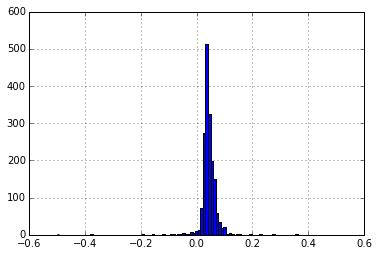

In [187]:
investor_fut_bucket_30360_xirr_orig.hist(bins=np.linspace(-.5,.5,110))

In [205]:
inv_count,inv_bin=np.histogram(investor_fut_bucket_30360_xirr_orig,bins=np.linspace(-.5,.5,101))


In [240]:
cashflows_act_investor[cashflows_act_investor.id_loan==1545]

,date,fk_user_investor,id_loan,payment,dcf,rating_base,rating_switch,payback_state
139859,2015-04-30,34180,1545,13.14,-0.079452,E,3,payback_received
164594,2015-04-30,34180,1545,5000.00,-0.079452,E,3,payback_received
192195,2015-04-07,34180,1545,-5000.00,-0.016438,E,3,payback_received


In [207]:
inv_hist=pd.DataFrame({'bin':inv_bin[:-1],'count':inv_count})

In [208]:
inv_hist.to_clipboard()

In [43]:
%matplotlib inline

In [154]:
loans_fut_bucket_30360_xirr_orig*100

rating_switch
1                2.446569
2                3.991386
3                3.453717
dtype: float64

In [165]:
loans_fut_bucket_30360_xirr_orig*100 

rating_switch
1                2.915440
2                4.099140
3                3.495064
dtype: float64

In [47]:
z1=cashflows_fut_bucket_30360[cashflows_fut_bucket_30360.payback_state!='payback_complete']

xirr(z1.payment, z1.dcf)

0.03470183916784976

In [42]:
loans_fut_bucket_30360_xirr_groups*100

rating_switch  rating_base
1              A              2.164635
               B             -0.289620
               C              2.843701
               D              4.380164
               E              7.495481
2              A              2.336687
               B              3.229219
               C              4.145394
               D              5.631069
               E              7.443198
3              A              2.390730
               B              2.876238
               C              3.830051
               D              4.275146
               E              4.906416
dtype: float64

In [43]:
loans_fut_bucket_30360_xirr_groups.to_clipboard()

In [308]:
loans_fut_bucket_30360_xirr_groups*100

rating_switch  rating_base
1              A              1.643829
               B             -0.131926
               C              2.983228
               D              4.437063
               E              7.266957
2              A              1.954274
               B              2.373271
               C              4.145764
               D              5.446206
               E              7.389547
3              A              2.368428
               B              2.950076
               C              3.790125
               D              3.940688
               E              4.880346
dtype: float64

In [167]:
loans_fut_xirr_groups=cashflows_fut[cashflows_fut.payback_state!='payback_complete'].groupby(['base_date','rating_base']).apply(lambda x: xirr(x.payment,x.dcf))

In [246]:
loans_fut_xirr_groups*100

rating_switch  rating_base
1              A               2.318630
               B               2.276984
               C               3.590574
               D               5.797576
               E               7.664678
2              A               2.533089
               B               3.506267
               C               6.085838
               D               7.710767
               E               7.674173
3              A             -15.986781
               B             -15.818247
               C             -14.123845
               D             -11.749378
               E             -12.484912
dtype: float64

In [309]:
(loans_fut_bucket_xirr_groups*100)

rating_switch  rating_base
1              A              1.643829
               B             -0.131926
               C              2.983228
               D              4.437063
               E              7.266957
2              A              1.954274
               B              2.373271
               C              4.145764
               D              5.446206
               E              7.389547
3              A              2.368428
               B              2.950076
               C              3.790125
               D              3.940688
               E              4.880346
dtype: float64

In [100]:
miss_loans=set(loans.id_loan) ^ set(payment_plans.fk_loan) # symmetric difference

In [251]:
(loans_xirr.loc[mth3_loans]*100).hist()

In [39]:
irreg_payments_sql="select * from backend.loan_payment_plan where plan ~* 'IRREGULAR' and dwh_country_id=1"
# problem with like '%irregular%#
irreg_payments=psql.read_sql_query(irreg_payments_sql,conn)
irreg_payments.columns
cols=irreg_payments.columns.values.tolist()
cols.remove('plan')
cols
li=[]
cols=irreg_payments.columns.values.tolist()
cols.remove('plan')

for i in range(irreg_payments.shape[0]):
    z=pd.read_json(irreg_payments.plan[i])
    for c in cols:
        z.loc[:,c]=irreg_payments.iloc[i][c]
    li.append(z)

irreg_p=pd.concat(li)


In [581]:
actual_payments.in_arrears_since_days_30360.unique()

array([  nan,   16.,   13.,   15.,   46.,   76.,  103.,  136.,  165.,
        196.,   75.,   45.,   29.,   60.,   27.,   30.,   21.,   59.,
         90.,  120.,   89.,  150.,   87.,   57.,  117.,  179.,  210.,
        119.,   26.,   43.,   28.,   73.,  106.,  105.,  166.,   20.])

In [608]:
z1=pd.DataFrame(actual_payments.set_index(['iso_date','fk_loan'])[['interval','in_arrears_since', 'in_arrears_since_days_30360']])
z1['bucket']=np.minimum(np.ceil(z1.in_arrears_since_days_30360/30.0),4)
z1['bucket']=z1['bucket'].fillna(0)
a1=z1.bucket.unstack()

a2=a1.shift(-1, freq='M')
a3=a1.shift(-2, freq='M')
a4=a1.shift(-3, freq='M')
a5=a1.shift(-4, freq='M')
a6=a1.shift(-5, freq='M')
a7=a1.shift(-6, freq='M')

# do merge
print z1.shape
z1['in_arrears_since_1M']=a2.stack()
print z1.shape
z1['in_arrears_since_2M']=a3.stack()
print z1.shape
z1['in_arrears_since_3M']=a4.stack()
print z1.shape
z1['in_arrears_since_4M']=a5.stack()
print z1.shape
z1['in_arrears_since_5M']=a6.stack()
print z1.shape
z1['in_arrears_since_6M']=a7.stack()
print z1.shape
# trying to detemine stability 

z3=z1.groupby(['bucket','in_arrears_since_1M']).size()
z4=z3.unstack().fillna(0)

(9026, 4)
(9026, 5)
(9026, 6)
(9026, 7)
(9026, 8)
(9026, 9)
(9026, 10)


In [617]:
n_rolls=6
for lag in 1 + np.arange(n_rolls):
    print lag


1
2
3
4
5
6


In [627]:
def calc_arrears_pd(act_payments,start_date,end_date):
    z1=pd.DataFrame(act_payments.set_index(['iso_date','fk_loan'])[['interval','in_arrears_since', 'in_arrears_since_days_30360']])
    z1['bucket']=np.minimum(np.ceil(z1.in_arrears_since_days_30360/30.0),4)
    z1['bucket']=z1['bucket'].fillna(0)
    a1=z1.bucket.unstack()
    # A1 HAS DATE INDEX AND LOAN COLUMN
    n_rolls=6
    # nb this is dropping new loans...
    
    def lag_name(lag):
        return 'after_{}M'.format(lag)
    
    for lag in 1 + np.arange(n_rolls):
        z1[lag_name(lag)]=a1.shift(-lag, freq='M').stack()
        
    trans={}
    for lag in 1 + np.arange(n_rolls):
        trans[lag_name(lag)]=z1.groupby(['bucket',lag_name(lag)]).size().unstack().fillna(0)
    return trans
    
    

In [628]:
trans_counts=calc_arrears_pd(actual_payments,1,23)

In [623]:
trans_counts.keys()

['after_3M', 'after_2M', 'after_4M', 'after_1M', 'after_5M', 'after_6M']

In [629]:
print trans_counts

{'after_3M': after_3M     0    1   2   3   4
bucket                         
0         4026  142  47  25   0
1           63   60  21   8  15
2            6    7   8   4  11
3            6    1   1   2   5
4            0    0   0   0   4, 'after_2M': after_2M     0    1   2   3   4
bucket                         
0         5213  159  57   1   0
1           70   78  19  31   0
2            8   10  10   6  15
3            4    3   1   3  11
4            1    0   0   0   9, 'after_4M': after_4M     0    1   2   3   4
bucket                         
0         3066  124  44  22  11
1           51   46  14   6  13
2           10    2   3   3   5
3            1    2   1   2   4, 'after_1M': after_1M     0    1   2   3   4
bucket                         
0         6698  175   7   0   0
1           76  106  71   2   0
2            7    7  13  32   3
3            4    2   3   7  13
4            1    0   0   0  19, 'after_5M': after_5M     0   1   2   3   4
bucket                        
0        

In [612]:
z1.interval.isnull().sum()

54

In [614]:
z1.head()

,,interval,in_arrears_since,in_arrears_since_days_30360,bucket,in_arrears_since_1M,in_arrears_since_2M,in_arrears_since_3M,in_arrears_since_4M,in_arrears_since_5M,in_arrears_since_6M
iso_date,fk_loan,,,,,,,,,,
2014-01-31,7,0,None,NaN,0,0,0,0,0,0,0
2014-02-28,7,1,None,NaN,0,0,0,0,0,0,0
2014-03-31,7,2,None,NaN,0,0,0,0,0,0,0
2014-04-30,7,3,None,NaN,0,0,0,0,0,0,0
2014-05-31,7,4,None,NaN,0,0,0,0,0,0,0


In [607]:
z4

in_arrears_since_1M,0.0,1.0,2.0,3.0,4.0
bucket,,,,,
0,6698,175,7,0,0
1,76,106,71,2,0
2,7,7,13,32,3
3,4,2,3,7,13
4,1,0,0,0,19


In [597]:
z4

in_arrears_since_1M,0.0,1.0,2.0,3.0,4.0
bucket,,,,,
0,6698,175,7,0,0
1,76,106,71,2,0
2,7,7,13,32,3
3,4,2,3,7,13
4,1,0,0,0,19


In [585]:
a1.head()

fk_loan,7,9,10,11,12,13,14,15,16,17,...,1902,1912,1918,1921,1923,1935,1938,1951,1967,1968
iso_date,,,,,,,,,,,,,,,,,,,,,
2014-01-31,NaN,NaN,NaN,1,NaN,1,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-02-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-03-31,NaN,NaN,1,NaN,NaN,NaN,1,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-04-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-05-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [586]:
a2.head()

fk_loan,7,9,10,11,12,13,14,15,16,17,...,1902,1912,1918,1921,1923,1935,1938,1951,1967,1968
iso_date,,,,,,,,,,,,,,,,,,,,,
2013-12-31,NaN,NaN,NaN,1,NaN,1,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-01-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-02-28,NaN,NaN,1,NaN,NaN,NaN,1,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-03-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-04-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [599]:
loans.loan_nr[loans.id_loan==815]

471    547197732
Name: loan_nr, dtype: int64

In [107]:
loan_plan_nar=payment_plans_idx.loc[payment_plans_idx.interval!=0,['interest_amount','initial_principal_amount']].groupby(level=(0,1)).sum()